# Лабораторная работа №3

## Связный список

### Задание №1
Возьмите реализацию класса UnorderedList из лекционных материалов и выполните
следующие доработки:
1. Реализуйте оставшиеся методы этого класса append(item), index(item),
insert(pos,item), pop(), pop(pos). Требования к работе этих методов посмотрите в
лекционной презентации.
2. Реализуйте метод __str__, чтобы содержимое списка отображалось в Python-стиле (в
квадратных скобках).
3. Реализуйте метод “среза”. Он должен принимать два параметра (start и stop) и
возвращать копию списка, начиная с позиции start и заканчивая (но не включая!)
позицией stop.
Все выполненные доработки должны быть протестированы.

In [1]:
class Node:
    def __init__(self, initdata, NextNode = None):
        self.data = initdata
        self.past = None
        if isinstance(NextNode, Node): 
            self.next = NextNode
            NextNode.past = self
        else:
            self.next = None
 
    def getData(self):
        return self.data
 
    def getNext(self):
        return self.next
        
    def getPast(self):
        return self.past
 
    def setData(self, newdata):
        self.data = newdata
 
    def setNext(self, newnext):
        self.next = newnext
        if newnext:
            newnext.past = self
 
    def setPast(self, newpast):
        self.past = newpast
        if newpast:
            newpast.next = self
    
    def getTail(self):
        if self.next:
            return self.getNext().getTail()
        else:
            return self
 
    def __float__(self):
         return float(self.getData())
    
    def __int__(self):
         return int(self.getData())
    
    def __getitem__(self):
        return self.getData()
    
    def __str__(self): 
        return str(self.data)
    
    def __repr__(self):
        return str(self)
    
class UnorderedList:
 
    def __init__(self):
        self.head = None
 
    def isEmpty(self):
        return self.head == None
 
    def add(self, item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
 
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()
        return count
 
    def search(self, item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()
        return found
 
    def remove(self, item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()
        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())
 
    def append(self, item):
        if self.head:
            current = self.head
            while current.getNext():
                    current = current.getNext()     
            current.setNext(Node(item))
        else:
            self.head = Node(item)
    
    def index(self, item):
        current = self.head
        index = 0
        while current:
            if current.getData() == item:
                return index
            else:
                index = index + 1
                current = current.getNext()
        return None 
        
    def insert(self, pos, item):
        current = self.head
        index = 0
        previous = None
        while current != None and index != pos:
                index = index + 1
                previous = current
                current = current.getNext()
        if previous == None:
            temp = Node(item)
            temp.setNext(current)
            self.head = temp 
        else:
            temp = Node(item)
            temp.setNext(current)
            previous.setNext(temp)
    
    def pop(self, pos = None):
        current = self.head
        previous = None
        index = 0
        while current.getNext() and index != pos:
            index = index + 1
            previous = current
            current = current.getNext()
        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())
        return current
 
    def replacement(self, key, item, tail = None):
        if self.isEmpty():
            self.head = item
            return  
        if key < 0:
            key = self.size() + key
            if key < 0:
                return
        previous = None
        current = self.head
        index = 0
        while index <= key:
                if index == key:
                    if tail:
                        tail.setNext(current.getNext())
                    else:
                        item.setNext(current.getNext())
                    if previous:
                        previous.setNext(item)
                    else:
                        self.head = item
                    return 
                index = index + 1
                if previous:
                    previous.setNext(current)
                else:
                    previous = current
                current = current.getNext()
                
    def __setitem__(self, key, item):
        if isinstance(item, Node):
            tail = item.getNext().getTail()
            self.replacement(key,item, tail)
        else:
            temp = Node(item)
            self.replacement(key,temp)
            
    def __getitem__(self, item):
        if self.isEmpty():
            return None
        if isinstance(item, slice):     
            start = None
            stop = None
            step = None
            if item.start == None:
                start = 0
            else:
                start = item.start
            if item.step == None or item.step == 0:
                step = 1
            else:
                step = item.step
            if item.stop == None:
                if step < 0:
                    stop = -1
                else:
                    stop = self.size()
            else:
                stop = item.stop
            if start < 0:
                start = self.size() - start
                if start < 0:
                    start == 0
            if stop < 0:
                stop = self.size() + stop
                if stop < 0:
                    stop = -1
            if stop < start and step > 0:
                return []
            if start >= self.size() or stop > self.size() or step >= self.size() or start < 0 or (stop < -1 and step > 0):
                return []
            slise = []
            current = self.head
            index = start
            for i in range(index):
                current = current.getNext()
            for i in range(start, stop, step):
                if index == i:
                    slise.append(current)  
                index = index + step
                if step < 0:
                    current = self.head
                    for i in range(index):
                        current = current.getNext()
                else:
                    current = current.getNext()
            return slise  
        else:
            if item < 0:
                item = self.size() + item
                if item < 0:
                    return
            current = self.head
            index = 0
            while index <= item:
                if index == item:
                    return current
                index = index + 1
                current = current.getNext()
        
    def __str__(self):
        current = self.head
        res = []
        while current != None:
                res.append(current)
                current = current.getNext()  
        return str(res)
    
    def __repr__(self):
        return str(self)
    
mylist = UnorderedList()
mylist.add(1)
mylist.add(2)
mylist.add(3)
mylist.add(4)
mylist.add(5)
mylist.add(6)
print(mylist)
print(mylist.size())
print(mylist.search(3))
print(mylist.search(10))
mylist.add(10)
print(mylist.search(10))
print(mylist.size())
mylist.remove(6)
print(mylist.size())
print(mylist.search(9))
mylist.append(11)
print(mylist.search(11))
print(mylist)
print(mylist.index(1))
mylist.insert(1, 2)
print(mylist)
print(mylist.index(1))
print(mylist.index(2))
print(mylist.pop())
print(mylist)
print(mylist.pop(1))
print(mylist)
print(mylist[0])
print(mylist[-1])
print(mylist[0: -1: 1])

[6, 5, 4, 3, 2, 1]
6
True
False
True
7
6
False
True
[10, 5, 4, 3, 2, 1, 11]
5
[10, 2, 5, 4, 3, 2, 1, 11]
6
1
11
[10, 2, 5, 4, 3, 2, 1]
2
[10, 5, 4, 3, 2, 1]
10
1
[10, 5, 4, 3, 2]


### Задание №2
Напишите функцию move_to_front для чтения строк с клавиатуры и сохранения их в
связном списке без повторов. Пользователь последовательно вводит с клавиатуры n строк.
При вводе строки, которая раньше не встречалась, вставьте ее в начало списка. При вводе
уже внесенной строки удалите ее из списка и снова вставьте в начало.
Такая функция реализует стратегию «сдвиг в начало», которая применяется в кешировании,
при сжатии данных и т.д.

In [2]:
def move_to_front(self):
    while True:
        Value = input()
        if Value == '': break
        if self.search(Value):
            self.remove(Value)
            self.add(Value)
        else:
            self.add(Value) 
        print(self)

mylist.move_to_front = move_to_front
mylist.move_to_front(mylist)

1
[1, 10, 5, 4, 3, 2, 1]
2
[2, 1, 10, 5, 4, 3, 2, 1]



### Задание №3
Напишите функцию, которая принимает в качестве аргумента первый узел односвязного
списка, обращает порядок элементов списка (с разрушением исходного) и возвращает вкачестве результата первый узел полученного списка. Разработайте два варианта решения
этой задачи: 1) итеративный и 2) рекурсивный.

In [3]:
def myReverb(node):
    if isinstance(node, Node):
        tail = None
        while node:
            node.next, tail, node = tail, node, node.next
        return tail
    
def myReverb2(node, tail = None):
    if isinstance(node, Node):
        node.next, tail, node = tail, node, node.next
        if node:
            return myReverb2(node, tail)
        else:
            return tail
        
print(mylist)
mylist[0] = myReverb(mylist[0])
print(mylist)
mylist[0] = myReverb2(mylist[0])
print(mylist)

[2, 1, 10, 5, 4, 3, 2, 1]
[1, 2, 3, 4, 5, 10, 1, 2]
[2, 1, 10, 5, 4, 3, 2, 1]


### Задание №4
Используя реализацию связного списка из задания № 1 (класс UnorderedList), реализуйте
следующие линейные структуры (необходимый набор методов посмотрите в лекционной
презентации):
1. Стек.
2. Очередь.
3. Дек.

Проведите тестирование реализованных линейных структур.
Продумайте и проведите показательный эксперимент, сравнивающий производительность
стека, очереди или дека, основанных на списках Python, с реализациями на основе
связанного списка. Например, для сравнения можно взять какую-либо операцию
выбранной линейной структуры.

In [4]:
class Stack(UnorderedList):
    
    def push(self, item):
        self.add(item)
        
    def peek(self):
        return self.head
    
    def pop(self):
        return super().pop(0)
    
class Queue(UnorderedList):
    
    def enqueue(self, item):
        self.append(item)
        
    def dequeue(self):
        return super().pop(0)

class Deque(UnorderedList):
    
    def addFront(self, item):
        self.insert(0, item)
        
    def addBack(self, item):
        self.append(item)
        
    def removeFront(self):
        return super().pop(0)
    
    def removeBack(self):
        return super().pop(self.size()-1)

In [5]:
print('\nStack\n')
myStack = Stack()
print(myStack.isEmpty())
myStack.push(1)
myStack.push(2)
myStack.push(3)
myStack.push(4)
myStack.push(5)
print(myStack)
print(myStack.size())
print(myStack.peek())
print(myStack.pop())
print(myStack)


Stack

True
[5, 4, 3, 2, 1]
5
5
5
[4, 3, 2, 1]


In [6]:
print('\nQueue\n')
myQueue = Queue()
print(myQueue.isEmpty())
myQueue.enqueue(1)
myQueue.enqueue(2)
myQueue.enqueue(3)
myQueue.enqueue(4)
print(myQueue)
print(myQueue.size())
print(myQueue.dequeue())
print(myQueue)


Queue

True
[1, 2, 3, 4]
4
1
[2, 3, 4]


In [7]:
print('\nDeque')
myDeque = Deque()
print(myDeque.isEmpty())
myDeque.addFront(1)
myDeque.addFront(2)
myDeque.addFront(3)
myDeque.addBack(4)
myDeque.addBack(5)
print(myDeque)
print(myDeque.size())
myDeque.removeFront()
myDeque.removeBack()
print(myDeque)


Deque
True
[3, 2, 1, 4, 5]
5
[2, 1, 4]


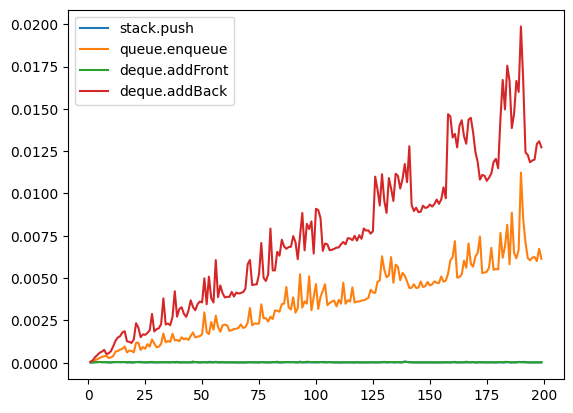

In [8]:
import timeit
import matplotlib.pyplot as plt

myStack = Stack()
myQueue = Queue()
myDeque = Deque()

T1 = timeit.Timer('myStack.push(i)', globals = globals())
T2 = timeit.Timer('myQueue.enqueue(i)', globals = globals())
T3 = timeit.Timer('myDeque.addFront(i)', globals = globals())
T4 = timeit.Timer('myDeque.addBack(i)', globals = globals())

x = [] 
t1 = []
t2 = []
t3 = []
t4 = []

i = 1
while i < 200:
    x.append(i)
    t = T1.timeit(number = 10)
    t1.append(t)
    t = T2.timeit(number = 10)
    t2.append(t)
    t = T3.timeit(number = 10)
    t3.append(t)
    t = T4.timeit(number = 10)
    t4.append(t)
    i+=1
    
plt.plot(x,t1, label = 'stack.push')
plt.plot(x,t2, label = 'queue.enqueue')
plt.plot(x,t3, label = 'deque.addFront')
plt.plot(x,t4, label = 'deque.addBack')
plt.legend()
plt.show()

### Задание №5
Реализуйте класс DoubleList для построения двухсвязных списков, в которых каждый узел
содержит ссылку на узел, предшествующий ему в списке, и ссылку на следующий узел.
Класс должен иметь следующие методы: проверка списка на пустоту, поиск элемента,
размер списка, вставка в начало, вставка в конец, удаление из начала, удаление из конца,
вставка перед указанным узлом, вставка после указанного узла, удаление указанного узла.
Проведите тестирование методов реализованного класса.

In [9]:
class DoubleList:
 
    def __init__(self):
        self.head = None
        self.tail = None
        
    def isEmpty(self):
        return self.head == None and self.tail == None
    
    def search(self, item):
        current = self.head
        while (current):
            if item == current.getData():
                return True
            else:
                current = current.getNext()
        return False
    
    def size(self):
        current = self.head
        count = 0
        while current:
            count = count + 1
            current = current.getNext()
        return count
    
    def addFront(self, item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
        if self.tail == None:
            self.tail = temp
        
    def addBack(self, item):
        temp = Node(item)
        temp.setPast(self.tail)
        self.tail = temp
        if self.head == None:
            self.head = temp
            
    def delFront(self):
        if self.head:
            if self.head.getNext():
                self.head.getNext().setPast(None)
                self.head = self.head.getNext()
            else:
                self.head = None
                self.tail = None
                
    def delBack(self):
        if self.tail:
            if self.tail.getPast():
                self.tail.getPast().setNext(None)
                self.tail = self.tail.getPast()
            else:
                self.head = None
                self.tail = None
    
    def insertBefore(self, pos, item):
        if pos >= self.size():
            return
        current = self.head
        index = 0
        previous = None
        while current and index != pos:
                index = index + 1
                previous = current
                current = current.getNext()
        if previous == None:
            temp = Node(item)
            temp.setNext(current)
            self.head = temp
            if self.tail == None:
                self.tail = temp
        else:
            print(current)
            print(current.getPast())
            temp = Node(item)
            temp.setNext(current)
            temp.setPast(previous) 
    
    def insertAfter(self, pos, item):
        if pos >= self.size():
            return
        current = self.head
        index = 0
        previous = None
        while current and index != pos:
                index = index + 1
                previous = current
                current = current.getNext()
        if previous == None:
            temp = Node(item)
            temp.setNext(current.getNext())
            self.head = temp
            if self.tail == None:
                self.tail = temp
        else:
            temp = Node(item)
            temp.setNext(current.getNext())
            temp.setPast(previous.getNext())
    
    def remove(self, pos):
        if pos >= self.size():
            return
        current = self.head
        index = 0
        while current and index != pos:
            index = index + 1
            previous = current
            current = current.getNext()
        if current and current.getPast():
            current.getPast().setNext(current.getNext())
        else:
            self.head = current.getNext()
    
    def __str__(self):
        current = self.head
        res = []
        while current != None: 
            res.append(current)
            current = current.getNext()  
        return str(res)
    
    def __repr__(self):
        return str(self)

In [10]:
myDoubleList = DoubleList()
print(myDoubleList.isEmpty())
myDoubleList.addFront(1)
myDoubleList.addBack(2)
myDoubleList.addFront(3)
myDoubleList.addBack(4)
myDoubleList.addFront(5)
myDoubleList.addBack(6)
print(myDoubleList.size())
print(myDoubleList)
myDoubleList.delFront()
myDoubleList.delBack()
print(myDoubleList)
print(myDoubleList.search(4))
myDoubleList.insertBefore(1, 9)
print(myDoubleList)
myDoubleList.insertAfter(3, 10)
print(myDoubleList)
myDoubleList.remove(3)
print(myDoubleList)

True
6
[5, 3, 1, 2, 4, 6]
[3, 1, 2, 4]
True
1
3
[3, 9, 1, 2, 4]
[3, 9, 1, 2, 10, 4]
[3, 9, 1, 10, 4]


### Задание №6
В HTML у каждого тега существуют открывающая и закрывающая формы, которые должны
быть сбалансированы, чтобы адекватно описывать веб-документ. Вот пример очень
простого веб-документа:
```html
<html>
<head>
<title>
Example
</title>
</head>
<body>
<h1>Hello, world</h1>
</body>
</html>
```
Напишите программу, которая, используя структуру данных стек, проверит HTML
документ на соответствие открывающих и закрывающих тегов.
За основу решения можно взять алгоритм проверки скобочной последовательности из
лекционных материалов.

In [11]:
class Stack:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items) - 1]

    def size(self):
        return len(self.items)


def check_html(path):
    s = Stack()
    with open(path) as file:
        for line in file:
            line = line.strip()
            while line != "":
                start1 = line.find("</")
                end = line.find(">", start1)
                if start1 > -1 and end > -1:
                    s.pop()
                    line = line.replace(line[start1:end+1], "")
                start2 = line.find("<")
                end = line.find(">", start2)
                if start2 > -1 and end > -1:
                    s.push(line[start2+1:end])
                    line = line.replace(line[start2:end+1], "")
                if start1 < 0 and start2 < 0:
                    break	
    if s.isEmpty():
        return True
    else:
        return False

print(check_html("index.html"))

True


### Задание №7
Стековый калькулятор - это устройство (реальное или виртуальное), которое вычисляет
значения арифметических выражений, записанных в постфиксной форме (также она носит
название Обратная польская запись — Википедия (wikipedia.org)). Стековым он называется
так как действует по следующим правилам: если нам встречается число - мы должны
поместить его в стек; если знак операции - мы должны достать из стека столько чисел,
сколько необходимо для выполнения данной операции и выполнить ее.
Именно так и работает т.н. математический сопроцессор (например, в INtel8086+AMD64)-
часть ЦП, отвечающая за операции над числами с плавающей запятой.
Реализуйте стековый калькулятор. Напишите программу, которая читает выражение в
обратной польской нотации и выводит получившееся значение или пишет, что выражение
составлено не корректно (если оно некорректно).

In [13]:
s = Stack()
while True:
    expr = input()
    if expr:
        expr = expr.split()
        for sumb in expr:
            if sumb in ("+", "-", "/", "*") and  s.size() > 1:
                num1 = int(s.pop())
                num2 = int(s.pop())
                print("Result: ", end="")
                if sumb == "+":
                    num = num1 + num2
                elif sumb == "-":
                    num = num1 - num2
                elif sumb == "*":
                    num = num1 * num2
                elif sumb == "/":
                    num = num1 / num2
                s.push(num)
                print(num)
            elif sumb.isdigit():
                s.push(sumb)
            else:
                print("Invalid operation")
    else:
        break

2 2 + 
Result: 4
3 - 4
Result: -1

